Load the python packages

In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import math


%matplotlib inline

load three datasets

In [2]:
aw_custs = pd.read_csv('AdvWorksCusts.csv')
aw_aveMonth = pd.read_csv('AW_AveMonthSpend.csv')
aw_bike=pd.read_csv('AW_BikeBuyer.csv')

In [3]:
aw_custs.dtypes
aw_custs.head().T
aw_custs.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,20234.225195,0.673891,1.500999,0.992009,2.006235,78122.511532
std,5342.515987,0.468802,1.138962,1.515048,1.682736,39710.985718
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15604.500000,0.000000,1.000000,0.000000,0.000000,47807.500000
50%,20221.000000,1.000000,2.000000,0.000000,2.000000,76120.000000
75%,24860.500000,1.000000,2.000000,2.000000,3.000000,105194.500000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


In [4]:
age=[]
for x in aw_custs.BirthDate:
    age.append(1998-int(x[:4]))
aw_custs['Age']=age
aw_custs.head().T

,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


check the number of NAN in each column

In [5]:
for col in aw_custs.columns:
    if aw_custs[col].dtype == object:
        count = 0
        count = [count + 1 for x in aw_custs[col] if pd.notna(x)]
        print(col + ' ' + str(sum(count)))

Title 88
FirstName 16519
MiddleName 9534
LastName 16519
Suffix 2
AddressLine1 16519
AddressLine2 276
City 16519
StateProvinceName 16519
CountryRegionName 16519
PostalCode 16519
PhoneNumber 16519
BirthDate 16519
Education 16519
Occupation 16519
Gender 16519
MaritalStatus 16519


drop the colomn which has too many NAN

In [6]:
aw_custs = aw_custs.drop(['Title','Suffix','AddressLine2'], axis=1)

combine first name and middle name

In [7]:
def combineName():
    result=[]
    for f, m in zip(aw_custs['FirstName'], aw_custs['MiddleName']):
        if pd.notna(m):
            result.append(f+'.'+m)
        else:
            result.append(f)
    return result
    
aw_custs['FirstName'] = combineName()

In [8]:
aw_custs = aw_custs.drop(['MiddleName'],axis=1)

In [9]:
aw_custs.CustomerID.unique().shape
aw_custs.shape
aw_custs.dtypes

CustomerID               int64
FirstName               object
LastName                object
AddressLine1            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
Age                      int64
dtype: object

In [10]:
aw_aveMonth.CustomerID.unique().shape
aw_aveMonth.shape
aw_aveMonth.dtypes

CustomerID       int64
AveMonthSpend    int64
dtype: object

In [11]:
print(aw_bike.CustomerID.unique().shape)
aw_bike.shape

(16404,)


(16519, 2)

remove rows of duplicate customer id, since id is unique. keep the latest one

In [12]:
aw_custs.drop_duplicates(subset='CustomerID', keep='last', inplace=True)
aw_aveMonth.drop_duplicates(subset='CustomerID', keep='last', inplace=True)
aw_bike.drop_duplicates(subset='CustomerID', keep='last', inplace=True)

In [13]:
for col in aw_aveMonth.columns:
    if aw_aveMonth[col].dtype == np.int64:
        count = 0
        count = [count + 1 for x in aw_aveMonth[col] if x<0]
        print(col + ' ' + str(sum(count)))

CustomerID 0
AveMonthSpend 0


In [14]:
for col in aw_bike.columns:
    if aw_bike[col].dtype == np.int64:
        count = 0
        count = [count + 1 for x in aw_bike[col] if x>1]
        print(col + ' ' + str(sum(count)))

CustomerID 16404
BikeBuyer 0


colomns will be used as features

In [15]:
def count_unique(aw_custs,cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(aw_custs[col].value_counts())
cols=[*aw_custs.columns[6:7],*aw_custs.columns[10:]]
cols
#count_unique(aw_custs,cols)

['CountryRegionName',
 'Education',
 'Occupation',
 'Gender',
 'MaritalStatus',
 'HomeOwnerFlag',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'TotalChildren',
 'YearlyIncome',
 'Age']

visualize the features

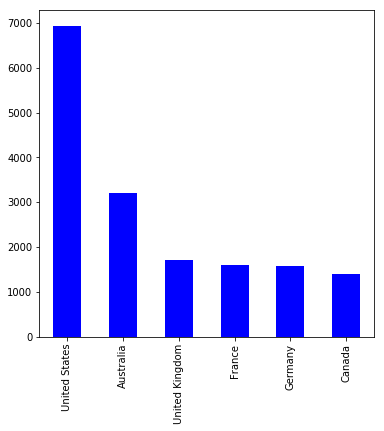

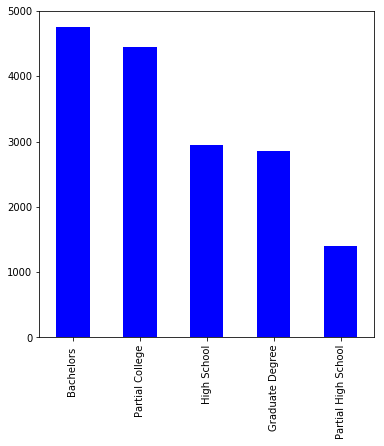

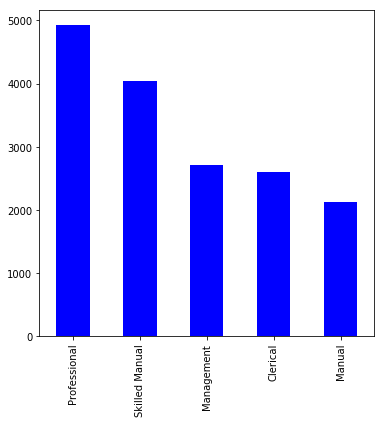

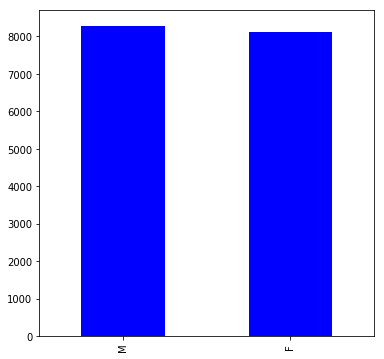

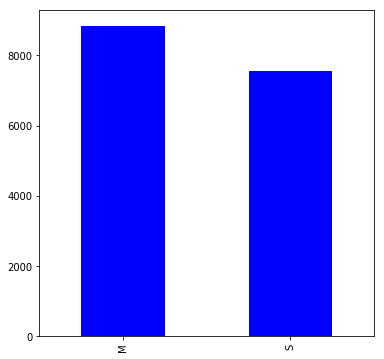

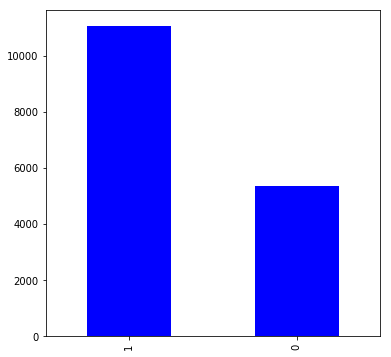

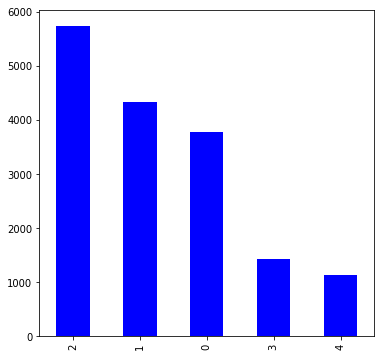

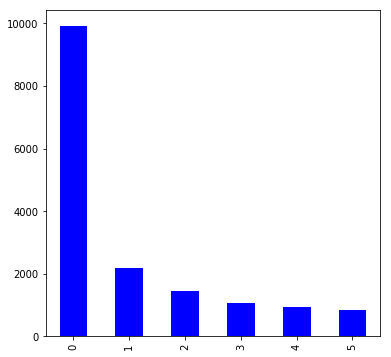

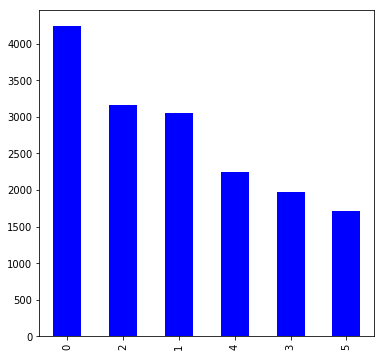

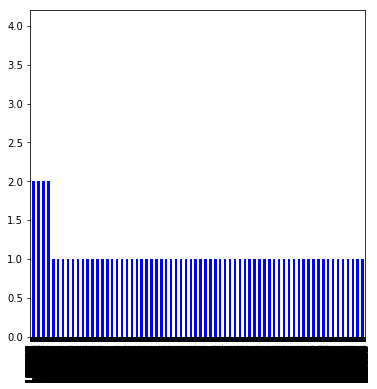

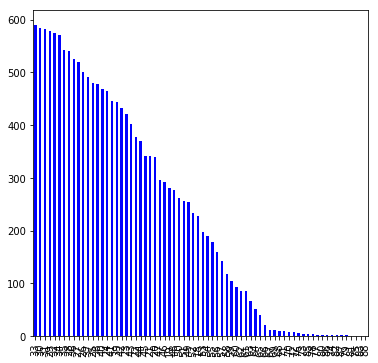

In [16]:
def plot_bars(aw_custs,cols):
    for col in cols:
        fig=plt.figure(figsize=(6,6))
        ax=fig.gca()
        counts=aw_custs[col].value_counts()
        counts.plot.bar(ax=ax,color='blue')
        plt.show()
plot_bars(aw_custs,cols)

create dummy variable for those categorical features

In [17]:
features=aw_custs['CountryRegionName']
enc=preprocessing.LabelEncoder()
enc.fit(features)
features=enc.transform(features)
ohe=preprocessing.OneHotEncoder(categories='auto')
encoded=ohe.fit(features.reshape(-1,1))
features = encoded.transform(features.reshape(-1,1)).toarray()
print(features.shape)

(16404, 6)


In [18]:
#features=np.array(aw_custs['HomeOwnerFlag'])
#features=features.reshape(-1,1)
features=np.array(aw_custs['YearlyIncome'])
features=features.reshape(-1,1)
scaler = preprocessing.StandardScaler().fit(features)
features=scaler.transform(features)
print(features)

[[ 1.50570312]
 [ 0.57923396]
 [ 0.34775512]
 ...
 [ 1.38251288]
 [-1.16292375]
 [-0.47191056]]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
def encode_string(feature):
    enc=preprocessing.LabelEncoder()
    enc.fit(feature)
    enc_feature=enc.transform(feature)
    ohe=preprocessing.OneHotEncoder(categories='auto')
    encoded=ohe.fit(enc_feature.reshape(-1,1))
    return encoded.transform(enc_feature.reshape(-1,1)).toarray()
columns=['Education',
 'Occupation',
 'Gender',
 'MaritalStatus',]
for col in columns:
    temp=encode_string(aw_custs[col])
    features=np.concatenate([features,temp],axis=1)
print(features.shape)

(16404, 15)


In [20]:
features=np.concatenate([features,np.array(aw_custs[['HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome','Age']])],axis=1)
features.shape

(16404, 21)

create regression model

In [21]:
nr.seed(123)
labels=np.array(aw_aveMonth['AveMonthSpend'])
index=range(features.shape[0])
index=ms.train_test_split(index,test_size=0.3)
x_train=features[index[0],:]
y_train=np.ravel(labels[index[0]])
x_test=features[index[1],:]
y_test=np.ravel(labels[index[1]])

In [22]:
scaler = preprocessing.StandardScaler().fit(x_train[:,-6:])
x_train[:,-6:]=scaler.transform(x_train[:,-6:])
x_test[:,-6:]=scaler.transform(x_test[:,-6:])
print(x_train.shape)
x_train[:5,:]

(11482, 21)


array([[-0.45630412,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.69366141, -0.43707444, -0.65575709, -0.59596293, -0.45811398,
         0.14349164],
       [ 0.25091963,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.69366141, -1.31366636,  1.32219465,  1.18804152,  0.24991032,
         0.23265557],
       [ 2.43710593,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.69366141,  2.19270132,  0.00356015, -0.59596293,  2.43857129,
        -0.39149192],
       [-0.93182248,  0.        ,  0.        ,  1.        

In [23]:
lin_mod=linear_model.LinearRegression(fit_intercept=False)
lin_mod.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [24]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 4.33699054 10.72881424  8.69519058 10.6767256  10.71586175 10.55282692
 11.00299758  8.16165691 10.38745865 10.88368825 10.93361769 11.6528339
 39.71658519 28.783169   22.58625009  0.06920077 -0.45106818 16.44986138
  0.55821899  4.27546128 -1.48630375]


test the model

In [25]:
lin_mod.score(x_test,y_test)

0.9455674656122705

In [30]:
predict_x=pd.read_csv('AW_test.csv')

In [ ]:
new_features=predict_x['CountryRegionName']
enc=preprocessing.LabelEncoder()
enc.fit(new_features)
new_features=enc.transform(new_features)
ohe=preprocessing.OneHotEncoder(categories='auto')
encoded=ohe.fit(new_features.reshape(-1,1))
new_features = encoded.transform(new_features.reshape(-1,1)).toarray()

In [ ]:
def encode_string(feature):
    enc=preprocessing.LabelEncoder()
    enc.fit(feature)
    enc_feature=enc.transform(feature)
    ohe=preprocessing.OneHotEncoder(categories='auto')
    encoded=ohe.fit(enc_feature.reshape(-1,1))
    return encoded.transform(enc_feature.reshape(-1,1)).toarray()
columns=['Education',
 'Occupation',
 'Gender',
 'MaritalStatus',]
for col in columns:
    temp=encode_string(predict_x[col])
    new_features=np.concatenate([new_features,temp],axis=1)
print(new_features.shape)

In [ ]:
new_features=np.concatenate([new_features,np.array(predict_x[['HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']])],axis=1)
new_features.shape

In [ ]:
scaler = preprocessing.StandardScaler().fit(new_features[:,-1:])
new_features[:,-1:]=scaler.transform(new_features[:,-1:])
print(new_features.shape)
new_features

In [ ]:
predict_y=lin_mod.predict(new_features)

In [ ]:
prediction=pd.DataFrame(predict_y,columns=['prediction']).to_csv('prediction.csv')

RandomForest Model

In [ ]:
nr.seed(1234)
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

In [ ]:
rf_reg.score(x_test, y_test)

In [ ]:
nr.seed(123)
inside =ms.KFold(n_splits=10,shuffle=True)
nr.seed(234)
outside=ms.KFold(n_splits=19,shuffle=True)

In [ ]:
param_grid={"max_features": [2, 3, 5, 10, 15], "min_samples_leaf":[3, 5, 10, 20]}
nr.seed(456)
rf_reg=RandomForestRegressor()
nr.seed(1212)
rf_reg=ms.GridSearchCV(estimator=rf_reg,param_grid=param_grid, cv=inside, scoring="roc_auc", return_train_score=True)
rf_reg.fit(x_train, y_train)
print(rf_reg.best_estimator.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)

AdaBoost Model

In [ ]:
nr.seed(111)
ab_reg=AdaBoostRegressor()
ab_reg.fit(x_train, y_train)

In [ ]:
ab_reg.score(x_test,y_test)

Neural Networks

In [ ]:
nr.seed(222)
nn_reg=MLPRegressor()
nn_reg.fit(x_train,y_train)

In [ ]:
nn_reg.score(x_test,y_test)

Support Vector Machine Model

In [ ]:
nr.seed(333)
svm_reg=svm.LinearSVR()
svm_reg.fit(x_train, y_train)

In [ ]:
svm_reg.score(x_test, y_test)

In [ ]:
nr.seed(555)
svm_reg=svm.SVR()
svm_reg.fit(x_train, y_train)

In [ ]:
svm_reg.score(x_test, y_test)